# week_06

<br>

## NLTK Inaugural

In [1]:
import nltk
nltk.download(['brown','inaugural'])

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\lgpc\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\lgpc\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


True

In [2]:
brown = nltk.corpus.brown

### 1) cfd. tabulate 활용 표만들기

In [3]:
#cfd

cfd = nltk.ConditionalFreqDist(
    (genre,word)
    for genre in brown.categories()
    for word in brown.words(categories=genre)
)

In [5]:
modals = ['can','could', 'would', 'will', 'might', 'may']
cfd.tabulate(conditions=brown.categories(), samples=modals)

                  can could would  will might   may 
      adventure    46   151   191    50    58     5 
 belles_lettres   246   213   392   236   113   207 
      editorial   121    56   180   233    39    74 
        fiction    37   166   287    52    44     8 
     government   117    38   120   244    13   153 
        hobbies   268    58    78   264    22   131 
          humor    16    30    56    13     8     8 
        learned   365   159   319   340   128   324 
           lore   170   141   186   175    49   165 
        mystery    42   141   186    20    57    13 
           news    93    86   244   389    38    66 
       religion    82    59    68    71    12    78 
        reviews    45    40    47    58    26    45 
        romance    74   193   244    43    51    11 
science_fiction    16    49    79    16    12     4 


### 2) cfd. tabulate 활용 표만들기 2

In [6]:
# modals의 빈도수가 포함된 cfd ( word -> modal_verb)

cfd1 = nltk.ConditionalFreqDist(
    (genre,modal)
    for genre in brown.categories()
    for modal in ['can','could', 'would', 'will', 'might', 'may']
    
    for word in brown.words(categories=genre)
        if word.lower() == modal
)
cfd1.tabulate()

                  can could   may might  will would 
      adventure    48   154     7    59    51   194 
 belles_lettres   249   216   221   113   246   397 
      editorial   124    57    79    39   235   185 
        fiction    39   168    10    44    56   291 
     government   119    38   179    13   244   120 
        hobbies   276    59   143    22   269    83 
          humor    17    33     8     8    13    56 
        learned   367   159   336   128   340   321 
           lore   170   142   170    50   178   188 
        mystery    45   145    15    57    25   189 
           news    94    87    93    38   389   246 
       religion    84    59    79    12    72    69 
        reviews    45    40    47    26    61    48 
        romance    79   195    11    51    49   247 
science_fiction    16    49     4    12    17    80 


<br>

<br>

## Inaugural
- 연설문 코퍼스

In [2]:
inaugural = nltk.corpus.inaugural

In [3]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

 ### ['america', 'citizen'] 빈도수를 cfd로 만들기

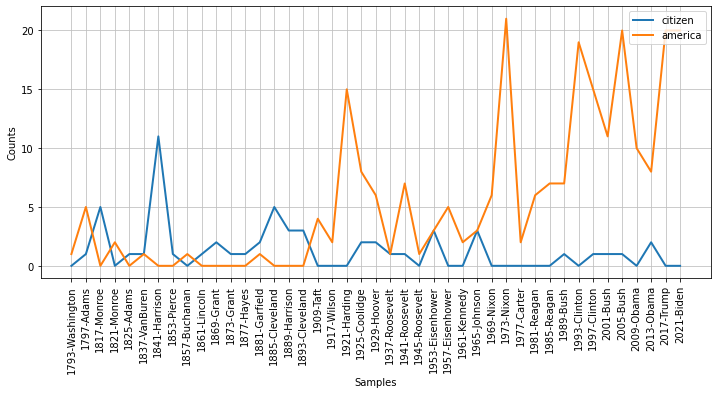

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [11]:
cfd2 = nltk.ConditionalFreqDist(
    (word, fileid[:-4])
    for word in ['citizen', 'america']
    for fileid in inaugural.fileids()
    
    for text in inaugural.words(fileids=fileid)
        if text.lower() == word
)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
cfd2.plot()

<br>

<br>

## 튜플 vs 리스트

- tuple 장점 (불변객체)
    - 변하지 않는 데이터 시퀀스를 만들 수 있다. 타인의 접근 막는다
    - 메모리 사용 적다.
   
   
- list 장점 (가변객체)
    - 튜플 장점 필요없을 때 전부 리스트 사용
    - 데이터를 순차적으로 파악할 때
    - 중복 데이터를 쓸 수 있음 (set과 다르게)

### 튜플, 리스트 생성

In [25]:
mptyT = ()
emptyT = tuple()

emptyL = []
emptyL = list()

emptyT, emptyL

((), [])

### 1) 요소 여러 개 일 때

In [13]:
# 튜플

alphabetT = ('a', 'b')
alphabetT = 'a', 'b'   #이렇게도 가능

# 리스트

alphabetL = ['a','b']### 1. 요소 여러 개 일 때

### 2) 요소 한 개 일 때

In [14]:
word = ('a') # 이렇게 하면 str임
word = ('a',) # 이렇게 ,을 찍어야 튜플

<br>

<br>

## tuple

- packing: 한 변수에 여러 데이터를 할당하는 것
    - list, tuple 자체. a = [1,2,3,4]
- unpacking: 한 변수에 여러 데이터가 들어 있을 때 여러 변수에 나누는 것
    - a='k', b='i', c='m'

### 1) unpacking

In [26]:
a,b,c = 'kim' # unpacking
a,b,c

('k', 'i', 'm')

### 2) 값 교환

In [16]:
# 값 교환하기

pwd = 'abcd'
userID = 'sky'

pwd = userID # 이렇게 하면 pwd정보 날아감, 임시 변수에 담아야 함

In [17]:
pwd = 'abcd'
userID = 'sky'

pwd, userID = userID, pwd   # 튜플을 통해 임시 변수에 담는 번거로움 없이 두 개의 값 교환 가능

### 3) 연산

In [19]:
# 연산

('a',) + (1,2)   # 튜플은 값이 변하지 않음. 그래서 더한 값은 아예 새로운 id로 들어감
(1,2) * 3

(1, 2, 1, 2, 1, 2)

### 4) 비교

In [20]:
# 비교

x = 1,2
y = 1,6

x<y

True

### 5) 순회 가능

In [21]:
# 순회가능
for i in x:
    print(x)

(1, 2)
(1, 2)


In [22]:
[i for i in x]

[1, 2]

### 6) comprehension?

In [23]:
# tuple comprehension은 없다! 그나마 방법이 있다면
tuple([i for i in x])
*[i for i in x],

(1, 2)

### 7) 형 변환

In [28]:
# 형 변환
dog = 'dog'

dogT = tuple(dog)  #이건 하나씩으로 바꿈

In [29]:
(dog,)   #이건 통째로 바꿈

('dog',)

In [30]:
list(dog)

['d', 'o', 'g']

### 8) 슬라이싱

In [30]:
# 슬라이싱 가능
dogT[0]

'd'

<br>

<br>

## 리스트 유용 함수들
- 추가, 변경, 삭제
- list comprehension upgrade

In [5]:
num = list(range(5))
num

[0, 1, 2, 3, 4]

### 1) 추가

In [6]:
# 추가 함수

num.append(6)  # 마지막에 요소 추가 됨
num

[0, 1, 2, 3, 4, 6]

In [7]:
# insert(index,item)

num.insert(0,8)
num

[8, 0, 1, 2, 3, 4, 6]

In [8]:
# 여러 개 추가
num.extend([6,6,6])  # 마지막에 리스트를 확장 / 이걸 두 번 실행하면 또 한 번 더 붙으니까 주의
num

[8, 0, 1, 2, 3, 4, 6, 6, 6, 6]

In [9]:
# extend와 append는 다름

x = [6,6,6]
num.append(x)
num

[8, 0, 1, 2, 3, 4, 6, 6, 6, 6, [6, 6, 6]]

In [10]:
num += x
num

[8, 0, 1, 2, 3, 4, 6, 6, 6, 6, [6, 6, 6], 6, 6, 6]

### 2) 변경

In [11]:
# offset바꾸기 가능

num[0] = 9
num

[9, 0, 1, 2, 3, 4, 6, 6, 6, 6, [6, 6, 6], 6, 6, 6]

In [12]:
# 슬라이스 가능

num[:3] = 2, 2, 2
num

[2, 2, 2, 2, 3, 4, 6, 6, 6, 6, [6, 6, 6], 6, 6, 6]

In [13]:
num[:3] = 'cat' # 쪼개져서 들어감
num

['c', 'a', 't', 2, 3, 4, 6, 6, 6, 6, [6, 6, 6], 6, 6, 6]

### 3) 삭제

In [14]:
# 삭제

del num[:3]
num

[2, 3, 4, 6, 6, 6, 6, [6, 6, 6], 6, 6, 6]

In [15]:
# 삭제 value값 지정 가능

num.remove([6,6,6])  # 이거 그냥 값 적으니까 안되더라?
num

[2, 3, 4, 6, 6, 6, 6, 6, 6, 6]

In [16]:
num.pop()
num

[2, 3, 4, 6, 6, 6, 6, 6, 6]

In [17]:
num.clear()
num

[]

<br>

<br>

## index

In [18]:
num = list(range(5))
num.index(4)

4

In [19]:
0 in num

True

<br>

<br>

## 정렬

In [40]:
num = [1,2,3,4,5]

result = sorted(num, reverse=True)  # 변한 값만 복사해서 출력, 할당이 필요
result

[5, 4, 3, 2, 1]

In [41]:
num = [1,2,3,4,5]

num.sort(reverse=True)  # 값을 할당하지 않아도 됨. 진짜로 값이 바뀜
num

[5, 4, 3, 2, 1]

In [42]:
num

[5, 4, 3, 2, 1]

In [45]:
# reverse와 reversed()의 차이

num.reverse()
reversed(num)
num

[1, 2, 3, 4, 5]

<br>

<br>

## 할당

In [2]:
a = list(range(1,5))
a

[1, 2, 3, 4]

In [3]:
b = a # 메모리 주소를 참조하는 것
b[0] = 6
a,b # 둘 다 바뀜

([6, 2, 3, 4], [6, 2, 3, 4])

In [4]:
id(a), id(b)   # id가 같음

(2958774214912, 2958774214912)

### 얕은 복사

In [8]:
# shallow copy: 참조하지 않고 새로운 객체에 할당하는 방법. 얕은 복사

a = [1,2,3,4]

c = a.copy()
d = list(a)
e = a[:]

In [9]:
id(a), id(c), id(d), id(e)   # id가 다름

(2958774412352, 2958774452672, 2958774441920, 2958774411392)

In [11]:
# 얕은 복사 시에는 아래와 같은 경우가 생김 _ 리스트 안 요소가 가변객체일 시

a = [1,2,3,4]
a.append([5, 5, 5])

f = a.copy()
print(id(a), id(f))   # 주소는 다르게 받음

f[-1][0] = 9
a,f             # 내용물은 둘 다 같이 바뀌어 버림

2958774447808 2958774447168


([1, 2, 3, 4, [9, 5, 5]], [1, 2, 3, 4, [9, 5, 5]])

### 깊은 복사

In [12]:
# 깊은 복사 방법

import copy
g = copy.deepcopy(a)
g

[1, 2, 3, 4, [9, 5, 5]]

In [13]:
# 복사한 리스트의 내용을 변경해도 원본 리스트는 변경되지 않는다.

g[-1] = 10
a, g      # 둘 다 바뀌는 게 아니라 g만 바뀜

([1, 2, 3, 4, [9, 5, 5]], [1, 2, 3, 4, 10])

<br>

<br>

## 순회

### enumerate 활용

In [74]:
# 리스트 + 인덱스 enumerate

for idx, item in enumerate(name):
    print(idx, item)

0 kate
1 royce
2 phill


### zip 활용

In [15]:
name = ['kate','royce','phill']
age = [77, 44, 53]


# (name, age)

for item1, item2 in zip(name,age):
    print((item1, item2))

('kate', 77)
('royce', 44)
('phill', 53)


In [16]:
for item1 in name:
    for item2 in age:
        print((item1,item2))

('kate', 77)
('kate', 44)
('kate', 53)
('royce', 77)
('royce', 44)
('royce', 53)
('phill', 77)
('phill', 44)
('phill', 53)


In [17]:
list(zip(name,age))

[('kate', 77), ('royce', 44), ('phill', 53)]

In [18]:
[info for info in zip(name,age)]

[('kate', 77), ('royce', 44), ('phill', 53)]

In [19]:
[(i,j) for i, j in zip(name,age)]

[('kate', 77), ('royce', 44), ('phill', 53)]

### zip과 for문 함께 사용하기 응용

In [20]:
# name, age를 이용해서 새로운 리스트 생성, 형태는 (이름, 나이), for문 사용

result = []

for i,j in zip(name, age):
    result.append((i,j))
    
print(result)

[('kate', 77), ('royce', 44), ('phill', 53)]


<br>

<br>

## list comprehension upgrade

<br>

### Quiz 1
- 아래 for문 처럼 출력되도록 list comprehension 만들기

In [21]:
for i in name:
    for j in age:
        print(i,j)

kate 77
kate 44
kate 53
royce 77
royce 44
royce 53
phill 77
phill 44
phill 53


In [22]:
# 1번 문제 풀이
[(i,j) for i in name for j in age]

[('kate', 77),
 ('kate', 44),
 ('kate', 53),
 ('royce', 77),
 ('royce', 44),
 ('royce', 53),
 ('phill', 77),
 ('phill', 44),
 ('phill', 53)]

<br>

<br>

### Quiz 2
- 아래 for문 처럼 출력되도록 list comprehension 만들기

In [31]:
result = []

for j in age:
    empty = []
    for i in name:
        empty.append((i,j))
    result.append(empty)

print(result)

[[('kate', 77), ('royce', 77), ('phill', 77)], [('kate', 44), ('royce', 44), ('phill', 44)], [('kate', 53), ('royce', 53), ('phill', 53)]]


In [24]:
# 2번 문제 풀이
[
    [(i,j) for i in name] for j in age
]

[[('kate', 77), ('royce', 77), ('phill', 77)],
 [('kate', 44), ('royce', 44), ('phill', 44)],
 [('kate', 53), ('royce', 53), ('phill', 53)]]

<br>

<br>

### Quiz 3
- [(대문자, 첫글자대문자, 글자수), ...] 리스트 만들기

In [32]:
sentence = "do not judge a book by its cover"

[(word.upper(), word.title(), len(word)) for word in sentence.split()]

[('DO', 'Do', 2),
 ('NOT', 'Not', 3),
 ('JUDGE', 'Judge', 5),
 ('A', 'A', 1),
 ('BOOK', 'Book', 4),
 ('BY', 'By', 2),
 ('ITS', 'Its', 3),
 ('COVER', 'Cover', 5)]

<br>

<br>

### Quiz 4

    1. 문장마다 스트링으로 변환해서 리스트로 반환   # ['문장1', '문장2']
    2. 전체를 스트링으로 변환   # '문장1 문장2'
    3. 전체 단어 리스트 가져오기   # [sunja, said, ...]

In [33]:
text = [
    ['Sunja', 'said', 'goodnight', 'to', 'her', 'mother'],
    ['Hansu', 'was', 'no', 'longer', 'in', 'Busan']
]

In [34]:
# 1번 문제 풀이

[' '.join(words) for words in text]

['Sunja said goodnight to her mother', 'Hansu was no longer in Busan']

In [35]:
# 2번 문제 풀이

' '.join([' '.join(words) for words in text])

'Sunja said goodnight to her mother Hansu was no longer in Busan'

In [36]:
# 3번 문제 풀이

[word for sent in text for word in sent]

['Sunja',
 'said',
 'goodnight',
 'to',
 'her',
 'mother',
 'Hansu',
 'was',
 'no',
 'longer',
 'in',
 'Busan']

<br>

<br>

## list comprehension 조건문

### if-else문 표현법
- 앞쪽으로 if문을 끌고 오면 됨

In [105]:
# if 문 => else를 어떻게 표현할까?

[i for i in range(10)]  # 짝수는 가져오고 홀수는 홀수='홀수' 되게 만드려면?

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [107]:
[i if i%2 == 0 else '홀수' for i in range(10)]   # 앞으로 if문을 끌고 오면 됨

[0, '홀수', 2, '홀수', 4, '홀수', 6, '홀수', 8, '홀수']